<a href="https://colab.research.google.com/github/alimoorreza/cs195-fall24-diffusion/blob/main/cs195_generative_model_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##__Make sure you are connected to GPU__
####__you won't be able to generate any image with cpu version of Stable Diffusion__

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
%%shell
[[ -d ./cs195-fall24-diffusion ]]
rm -rf ./cs195-fall24-diffusion
git clone https://github.com/alimoorreza/cs195-fall24-diffusion

Cloning into 'cs195-fall24-diffusion'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 6.69 MiB | 11.04 MiB/s, done.


In [2]:
%%shell
pip install --upgrade diffusers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
%%shell
pip install ./cs195-fall24-diffusion/modules/torchvision-0.19.1+cu121-cp310-cp310-linux_x86_64.whl

Processing ./cs195-fall24-diffusion/modules/torchvision-0.19.1+cu121-cp310-cp310-linux_x86_64.whl
torchvision is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [3]:
import torch
import torchvision
print(f"torch.__version__: {torch.__version__}")
print(f"torchvision.__version__: {torchvision.__version__}")

torch.__version__: 2.4.1+cu121
torchvision.__version__: 0.19.1+cu121


##__Stable Diffusion__
- [https://github.com/CompVis/stable-diffusion](https://github.com/CompVis/stable-diffusion?tab=readme-ov-file)

In [4]:
import torch
from diffusers import StableDiffusionPipeline
from matplotlib import pyplot
from PIL import Image
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#__Generate image from text prompt__
- [https://stable-diffusion-art.com/prompt-guide](https://stable-diffusion-art.com/prompt-guide/)

  0%|          | 0/50 [00:00<?, ?it/s]

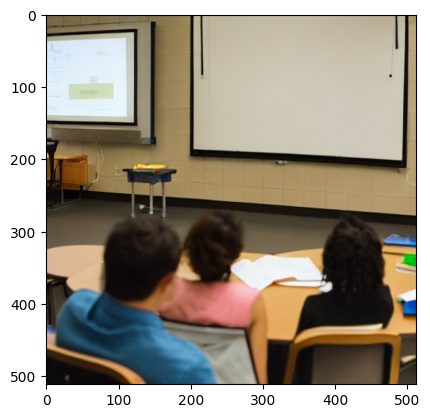

In [6]:
prompt  = "a photo of a professor teaching in a class"
pipe    = pipe.to("cuda")
image   = pipe(prompt).images[0]

image.save('/content/drive/MyDrive/cs195_fall24/generative_model_diffusion/professor_in_class.png') # save the image
pyplot.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

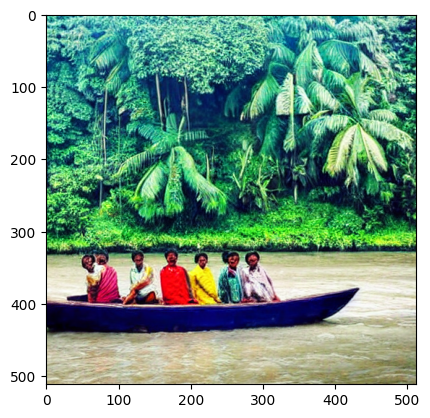

In [9]:
prompt  = "a photo of a boat ride on a river in Bangladesh"
pipe    = pipe.to("cuda")
image   = pipe(prompt).images[0]

image.save('/content/drive/MyDrive/cs195_fall24/generative_model_diffusion/boat_on_river.png') # save the image
pyplot.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

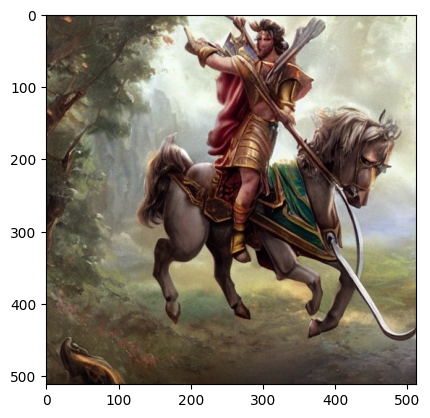

In [13]:
prompt  = 'A charming mythical hero, mounted on a chariot.'
pipe    = pipe.to("cuda")
image   = pipe(prompt).images[0]

image.save('/content/drive/MyDrive/cs195_fall24/generative_model_diffusion/charming_mythical_hero.png') # save the image
pyplot.imshow(image)



In [ ]:
prompt  = 'A charming mythical hero, mounted on a chariot.'
pipe    = pipe.to("cuda")
image   = pipe(prompt).images[0]

image.save('/content/drive/MyDrive/cs195_fall24/generative_model_diffusion/charming_mythical_hero_SD.png') # save the image
pyplot.imshow(image)



#__Group activity#1: Generate images following the Stable Diffusion guide__
- [https://stable-diffusion-art.com/prompt-guide](https://stable-diffusion-art.com/prompt-guide/)

In [ ]:
# your code
# ...
# ...
# ...


##__DDPM (Denoising Diffusion Probabilistic Models)__

model_index.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-cat-256/snapshots/82ca0d5db4a5ec6ff0e9be8d86852490bc18a3d9: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-cat-256/snapshots/82ca0d5db4a5ec6ff0e9be8d86852490bc18a3d9.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/1000 [00:00<?, ?it/s]

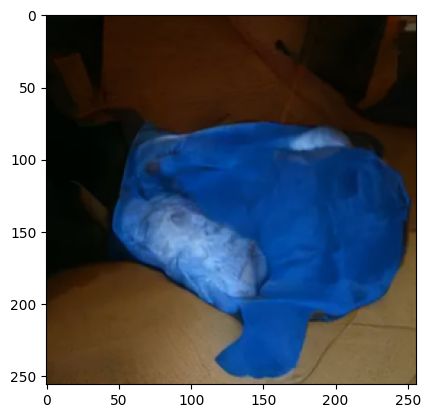

In [14]:
from diffusers import DDPMPipeline

pipe    = DDPMPipeline.from_pretrained("google/ddpm-cat-256")
pipe    = pipe.to("cuda")
image   = pipe().images[0] # run pipeline in inference (sample random noise and denoise; NO PROMPT)
image.save('/content/drive/MyDrive/cs195_fall24/generative_model_diffusion/randomly_generate_image_DDPM.png') # save the image
pyplot.imshow(image)
